In [1]:
import pandas as pd
import sklearn
from sklearn import tree
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt

### Prep data

In [2]:
# read in data
crime_data = pd.read_csv('Data\\final_data_clean.csv')

In [3]:
crime_data.shape

(1414, 31)

In [4]:
crime_data.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
crime_data.head()

,communityName,state,householsize,agePct12t29,agePct65up,pctWSocSec,pctWPubAsst,PctUsePubTrans,PctPopUnderPov,PctNotHSGrad,...,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,LemasPctOfficDrugUn,ViolentCrimesPerPop,has_pp_access,PctFedEduFunding,PctStateEduFunding
0,Aberdeen,NJ,2.89,26.94,7.59,19.87,2.93,12.82,3.18,17.15,...,0.015553,95.71,80.47,6.42,44.91,0.0,0.29732,0,4.633333,48.823333
1,Ada,OK,2.37,30.44,17.77,36.76,10.01,0.19,22.93,29.43,...,0.058850,87.75,56.21,3.97,41.14,0.0,0.53285,0,12.010000,63.510000
2,Agoura Hills,CA,3.08,24.89,3.61,10.53,1.58,0.62,3.53,7.13,...,0.015547,95.42,83.40,0.63,15.77,0.0,0.36876,0,1.110000,42.940000
3,Aiken,SC,2.56,23.43,14.62,30.95,8.48,0.00,15.69,20.62,...,0.039956,90.71,66.18,3.02,37.78,0.0,0.50420,0,7.870000,58.270000
4,Alabaster,AL,2.99,27.21,6.64,15.10,3.72,0.14,5.65,22.15,...,0.015137,95.66,82.71,0.00,21.97,0.0,0.13794,0,5.100000,57.450000


In [6]:
data = crime_data.drop(columns = ['communityName', 'state'])

### Cross Validation

In [7]:
# split data into training and testing
train, test = train_test_split(data, test_size=0.3, random_state = 2)

In [8]:
# check
train.shape[0] + test.shape[0]

1414

In [9]:
# break out explanatory and response variables
x_train = train.drop(columns = ['ViolentCrimesPerPop'])
x_test = test.drop(columns = ['ViolentCrimesPerPop'])
y_train = train['ViolentCrimesPerPop']              
y_test = test['ViolentCrimesPerPop']                         

### Modeling

#### 1. Decision Tree using default hyperparameters, including ALL features

In [10]:
dt = DecisionTreeRegressor(random_state = 27)

In [11]:
# fit the model
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=27)

In [12]:
# evaluate performance on test set
y_pred = dt.predict(x_test)

(array([  1.,   6.,  23.,  56., 230.,  69.,  31.,   6.,   0.,   3.]),
 array([-2.58395 , -2.023194, -1.462438, -0.901682, -0.340926,  0.21983 ,
         0.780586,  1.341342,  1.902098,  2.462854,  3.02361 ]),
 <BarContainer object of 10 artists>)

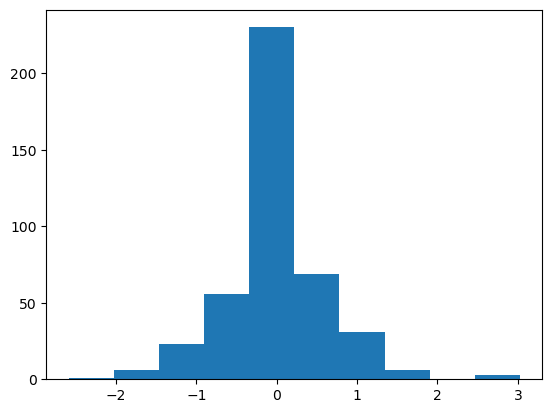

In [13]:
# visualize difference in actuals vs predicted
plt.hist(y_pred - y_test)

Text(0, 0.5, 'predicted crime rate')

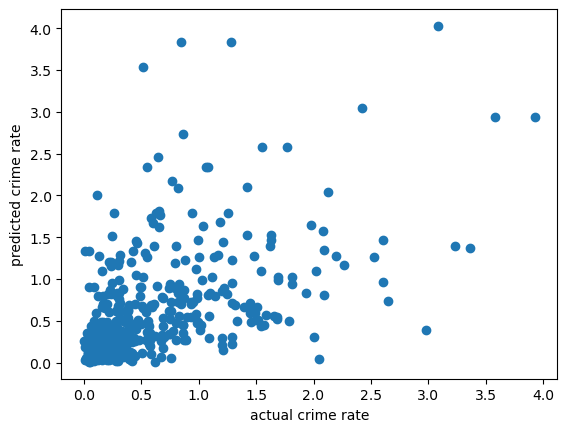

In [14]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual crime rate")
plt.ylabel("predicted crime rate")


In [15]:
# use mean squared error as evaluation metric for now:
mse = mean_squared_error(y_test, y_pred)
mse

0.3914979934032941

In [16]:
# check
t = list(y_test - y_pred)
t2 = [i**2 for i in t]
sum(t2)/len(t2)

0.3914979934032942

In [17]:
# look at feature importance based on this model
baseline_importances = pd.Series(dt.feature_importances_, x_train.columns)
baseline_importances.sort_values(ascending= False)

PctKidsBornNeverMar    0.476228
PctFam2Par             0.077665
HousVacant             0.052837
PctFedEduFunding       0.035902
PctVacantBoarded       0.035253
PersPerFam             0.029010
PctPopUnderPov         0.024174
PctNotHSGrad           0.023625
LemasPctOfficDrugUn    0.020084
PctHousOwnOcc          0.018968
PctVacMore6Mos         0.018700
PctStateEduFunding     0.018595
pctWPubAsst            0.017864
PctEmplManu            0.017827
PctWorkMom             0.016062
PctBSorMore            0.015009
PctUsePubTrans         0.014995
PctHousOccup           0.014409
PctOccupMgmtProf       0.013612
PctUnemployed          0.013494
PctOccupManu           0.010345
agePct12t29            0.009396
householsize           0.008551
pctWSocSec             0.007203
PctEmplProfServ        0.006485
agePct65up             0.003001
has_pp_access          0.000707
dtype: float64

<AxesSubplot:>

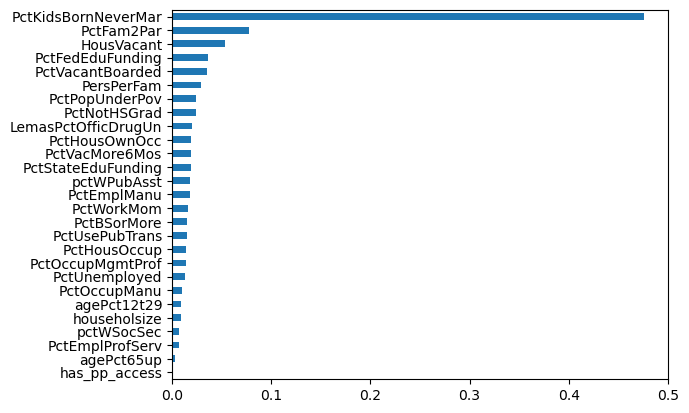

In [18]:
baseline_importances.sort_values().plot.barh()

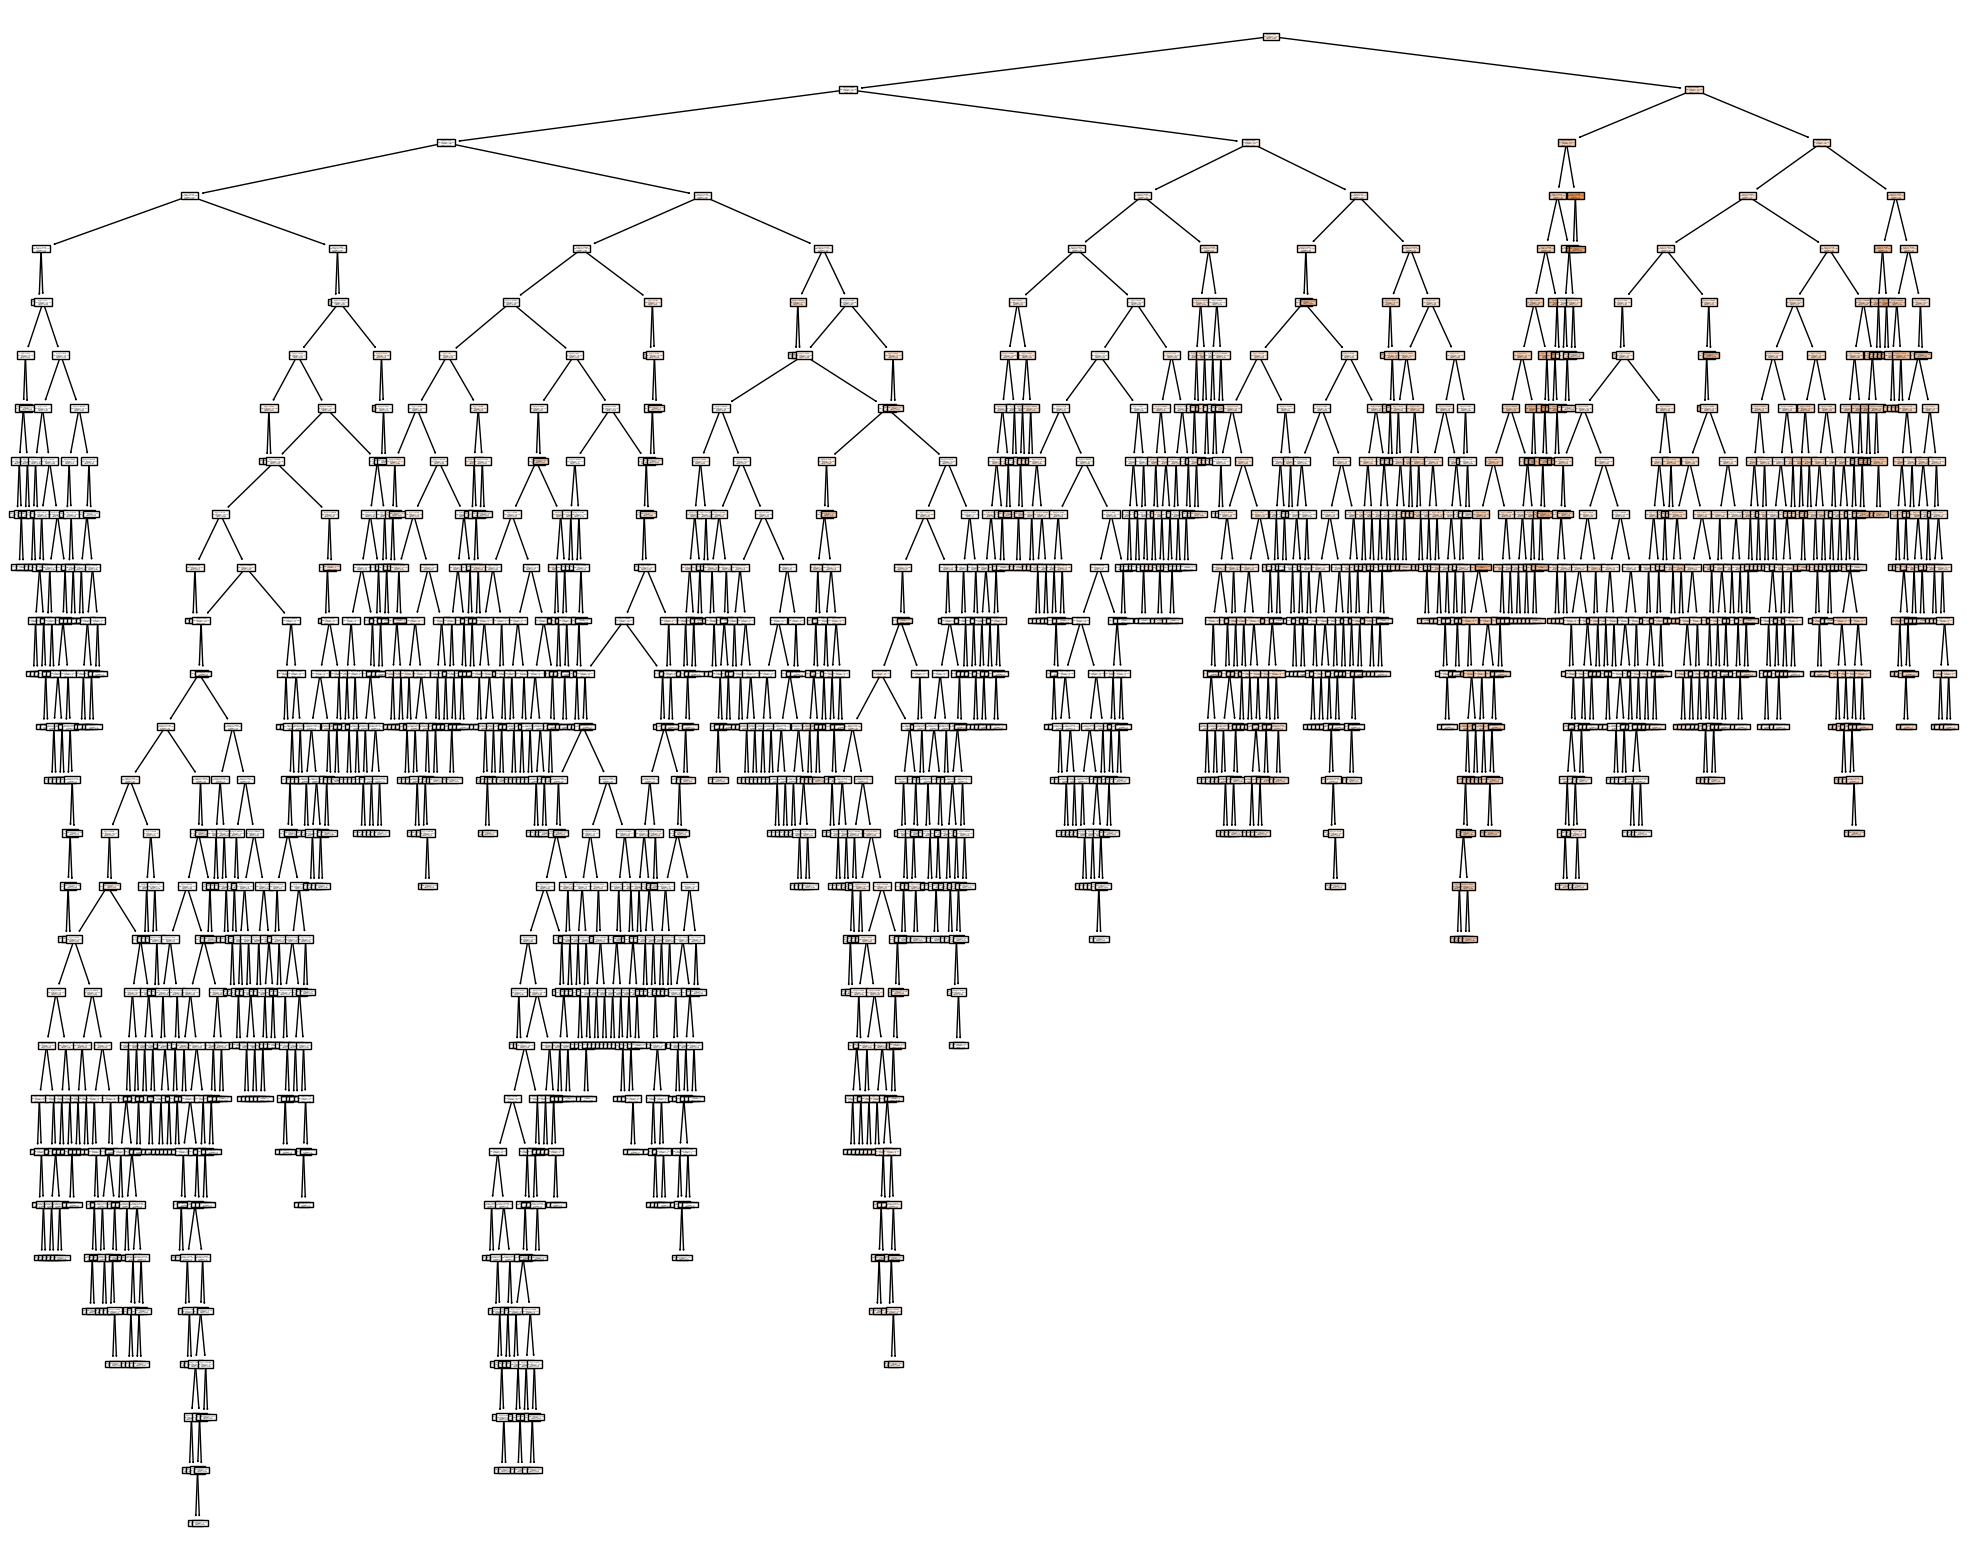

In [19]:
# plot the very impractical tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, filled=True)

#### 2. Decision Tree using default hyperparameters, with feature selection

In [20]:
# feature selection by ExtraTreesRegressor
reg = ExtraTreesRegressor()
reg.fit(x_train, y_train)


ExtraTreesRegressor()

In [21]:
# look at feature importances:
reg_importances = pd.Series(reg.feature_importances_, x_train.columns)
reg_importances.sort_values(ascending= False)

PctKidsBornNeverMar    0.297505
PctFam2Par             0.190815
PctVacantBoarded       0.044097
pctWPubAsst            0.039895
PctFedEduFunding       0.035822
PctPopUnderPov         0.030159
PctUnemployed          0.028308
PctWorkMom             0.021434
HousVacant             0.019952
PctUsePubTrans         0.019752
PersPerFam             0.018762
PctStateEduFunding     0.018550
LemasPctOfficDrugUn    0.018182
PctVacMore6Mos         0.018172
PctHousOccup           0.018079
agePct12t29            0.017927
PctEmplProfServ        0.017882
pctWSocSec             0.017088
PctNotHSGrad           0.016796
PctHousOwnOcc          0.016115
PctEmplManu            0.015415
householsize           0.014290
PctOccupMgmtProf       0.013974
agePct65up             0.013871
PctBSorMore            0.013522
PctOccupManu           0.012899
has_pp_access          0.010734
dtype: float64

In [22]:
# now, run a decision tree model on only the top 5 features from above:
top5 = ['PctKidsBornNeverMar', 'PctFam2Par', 'PctFedEduFunding', 'pctWPubAsst', 'PctPopUnderPov']

In [23]:
x_train5 = x_train[top5]
x_test5 = x_test[top5]

In [24]:
dt2 = DecisionTreeRegressor(random_state = 27)
dt2.fit(x_train5, y_train)

DecisionTreeRegressor(random_state=27)

In [25]:
# evaluate performance on test set
y_pred5 = dt2.predict(x_test5)

(array([  1.,   4.,  13.,  38., 206., 128.,  24.,   7.,   1.,   3.]),
 array([-3.01138 , -2.392122, -1.772864, -1.153606, -0.534348,  0.08491 ,
         0.704168,  1.323426,  1.942684,  2.561942,  3.1812  ]),
 <BarContainer object of 10 artists>)

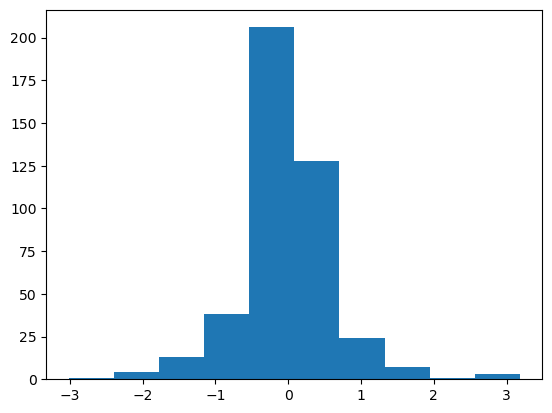

In [26]:
# visualize difference in actuals vs predicted
plt.hist(y_pred5 - y_test)

Text(0, 0.5, 'predicted crime rate')

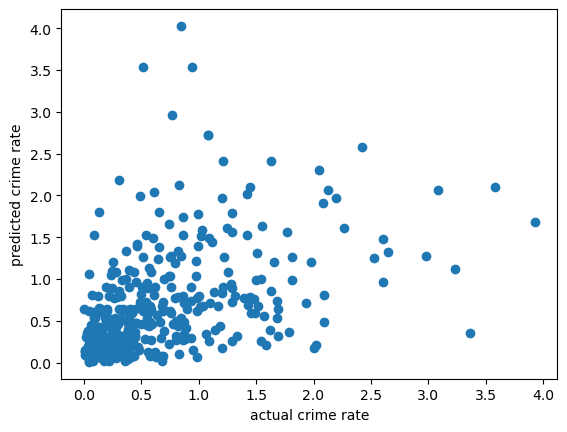

In [27]:
plt.scatter(y_test,y_pred5)
plt.xlabel("actual crime rate")
plt.ylabel("predicted crime rate")

In [28]:
# use mean squared error as evaluation metric for now:
mse = mean_squared_error(y_test, y_pred5)
mse

0.3961824292969412

In [29]:
# higher MSE, makes sense because fewer variables 

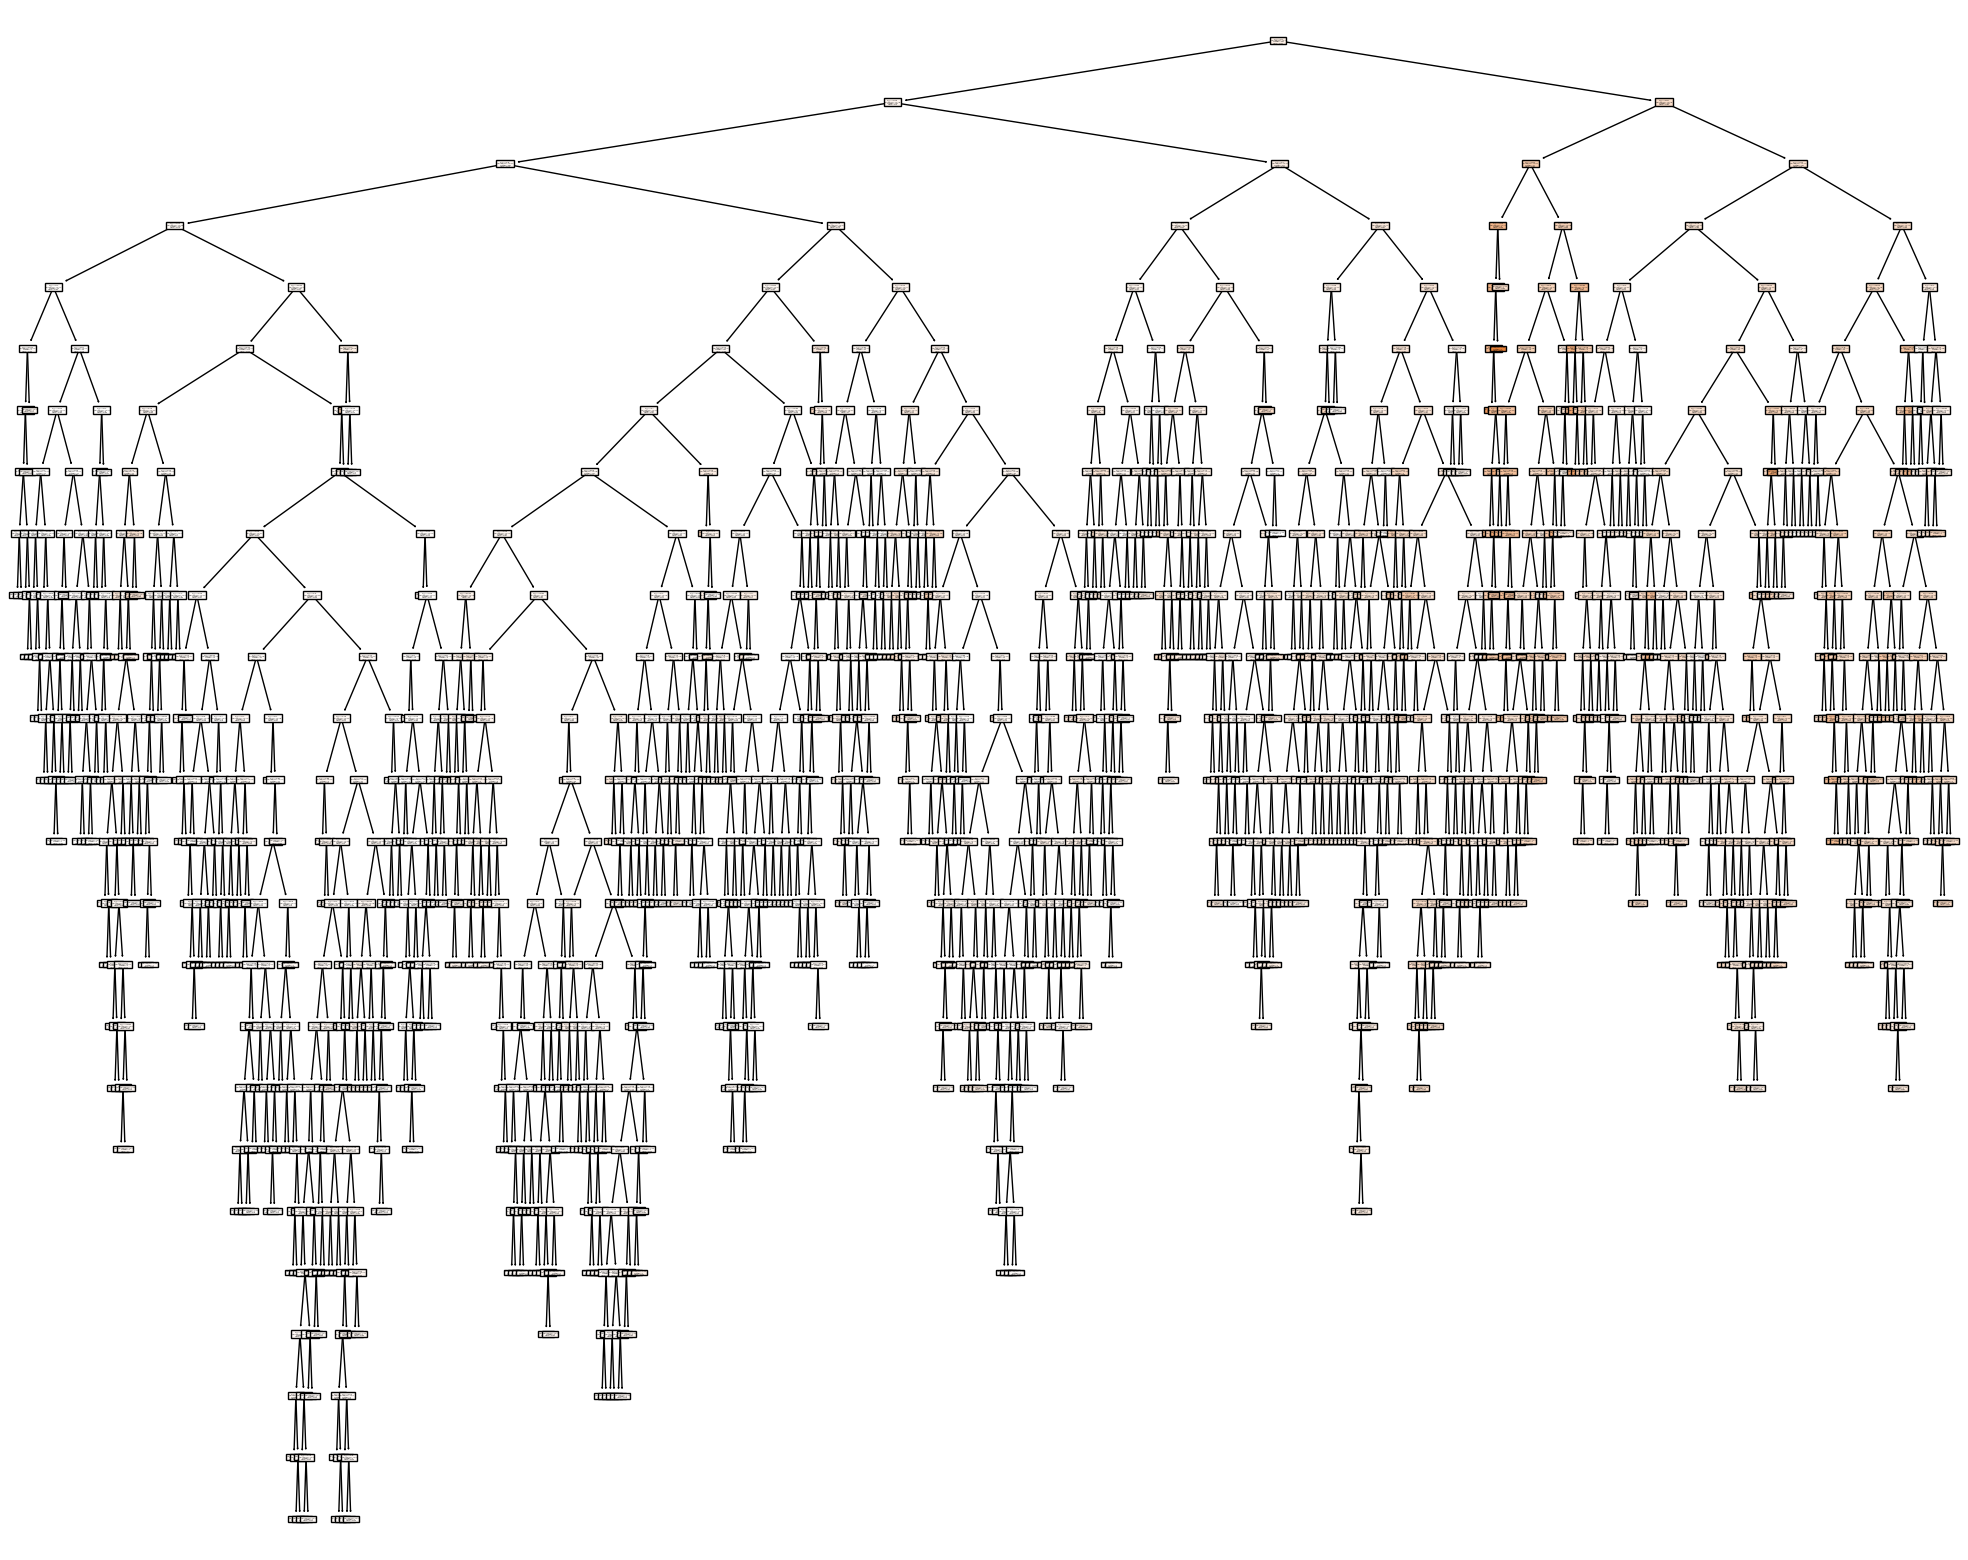

In [30]:
# plot the again impractical tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt2, filled=True)

#### 3. Decision Tree with hyperparameter optimization using ALL features

In [31]:
# initialize hyperparameter range for tuning, based off business cases
parameters={"splitter":["best","random"],
            "max_depth" : [1,2,3,4,5], # how deep the decision tree can go
           "min_samples_leaf":[5,10,15,20], # guarantees a minimum number of samples in a leaf node (leaves have no further splits)
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], # the minimum weighted fraction of the sum of total weights required to be at a leaf node
           "max_features":["auto","log2","sqrt",None],  # number of features to consider when looking for the best split
           "max_leaf_nodes":[10,20,30] }

In [32]:
dt3 = DecisionTreeRegressor(random_state = 27)

In [33]:
# Gridsearch to find the best set of parameters
tuning_model = GridSearchCV(dt3,param_grid=parameters,scoring='neg_mean_squared_error')

In [34]:
tuning_model.fit(x_train, y_train)

/Users/jennychen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9600 fits failed out of a total of 21600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9600 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jennychen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jennychen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/Users/jennychen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weigh

GridSearchCV(estimator=DecisionTreeRegressor(random_state=27),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [35]:
# output the "best" hyperparameters:
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [36]:
tuned_dt= DecisionTreeRegressor(max_depth=4,
                                max_features='auto',
                                max_leaf_nodes=10,
                                min_samples_leaf=5,
                                min_weight_fraction_leaf=0.1,
                                splitter='best')


In [37]:
tuned_dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, max_features='auto', max_leaf_nodes=10,
                      min_samples_leaf=5, min_weight_fraction_leaf=0.1)

Text(0, 0.5, 'predicted crime rate')

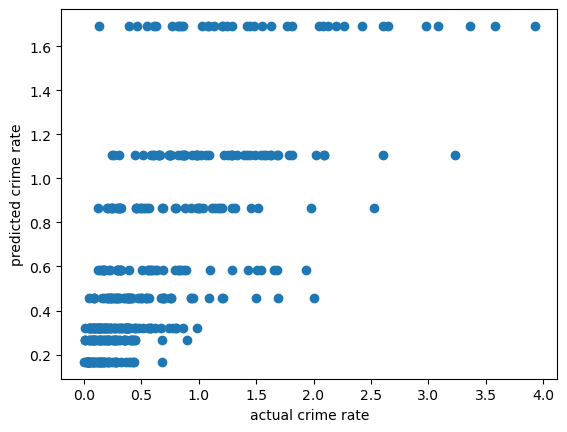

In [38]:
tuned_pred = tuned_dt.predict(x_test)
plt.scatter(y_test,tuned_pred)
plt.xlabel("actual crime rate")
plt.ylabel("predicted crime rate")

In [39]:
# use mean squared error as evaluation metric for now:
mse = mean_squared_error(y_test, tuned_pred)
mse

0.21188125746396994

In [40]:
# lowest MSE thus far!

In [41]:
# look at feature importance based on this model
baseline_importances = pd.Series(tuned_dt.feature_importances_, x_train.columns)
baseline_importances.sort_values(ascending= False)

PctKidsBornNeverMar    0.963409
PctFedEduFunding       0.036591
householsize           0.000000
PersPerFam             0.000000
has_pp_access          0.000000
LemasPctOfficDrugUn    0.000000
PctVacMore6Mos         0.000000
PctVacantBoarded       0.000000
PctHousOwnOcc          0.000000
PctHousOccup           0.000000
HousVacant             0.000000
PctWorkMom             0.000000
PctFam2Par             0.000000
PctOccupMgmtProf       0.000000
agePct12t29            0.000000
PctOccupManu           0.000000
PctEmplProfServ        0.000000
PctEmplManu            0.000000
PctUnemployed          0.000000
PctBSorMore            0.000000
PctNotHSGrad           0.000000
PctPopUnderPov         0.000000
PctUsePubTrans         0.000000
pctWPubAsst            0.000000
pctWSocSec             0.000000
agePct65up             0.000000
PctStateEduFunding     0.000000
dtype: float64

In [42]:
list(x_train.columns)

['householsize',
 'agePct12t29',
 'agePct65up',
 'pctWSocSec',
 'pctWPubAsst',
 'PctUsePubTrans',
 'PctPopUnderPov',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'PersPerFam',
 'PctFam2Par',
 'PctWorkMom',
 'PctKidsBornNeverMar',
 'HousVacant',
 'PctHousOccup',
 'PctHousOwnOcc',
 'PctVacantBoarded',
 'PctVacMore6Mos',
 'LemasPctOfficDrugUn',
 'has_pp_access',
 'PctFedEduFunding',
 'PctStateEduFunding']

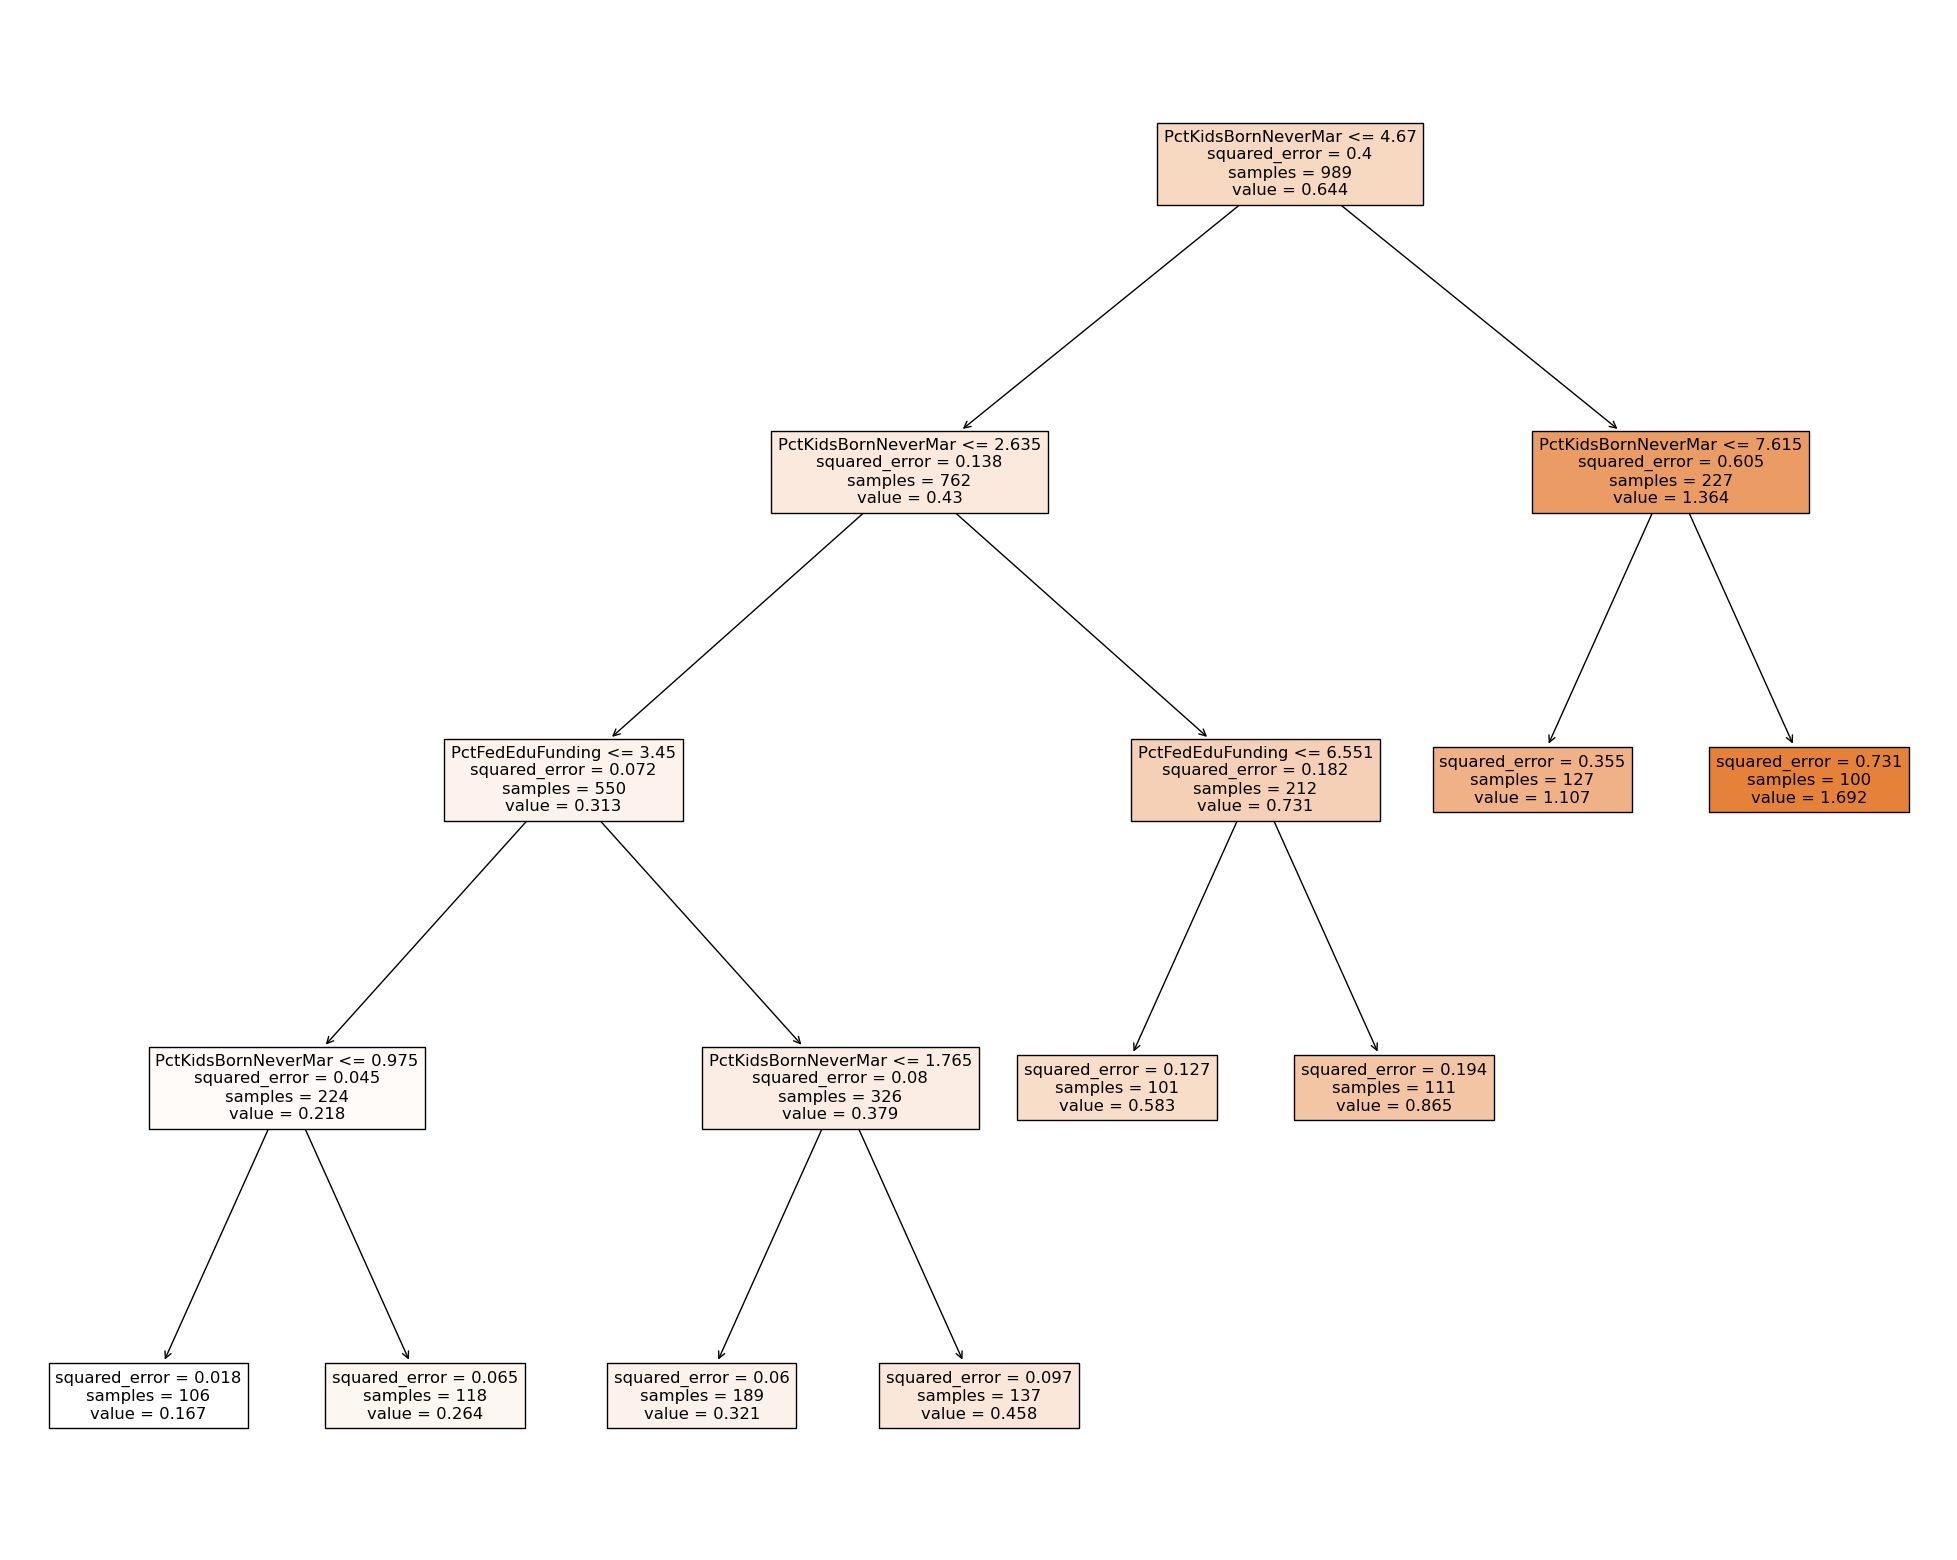

In [43]:
# plot the now interpretable tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tuned_dt, 
                   feature_names = list(x_train.columns),
                   filled=True)

In [44]:
# most important feature is percentage of kids born to never married parents
# percentage of kids headed by 2 parents
# 